In [1]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf

import work


<span style="font-family: arial; font-size:25px; color:pink">

Open ROOT file and extract data

In [2]:
file_name = "TB_FIRE_1101_hits.root"
hit_data_1101 = rf.get_ROOT_data_zip(file_name)

Folders: ['Hits;1']

Hits:
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
TLU_number           | uint64_t                 | AsDtype('>u8')
timestamp            | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
plane_ID             | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
ch_ID                | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
amplitude            | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
toa                  | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...


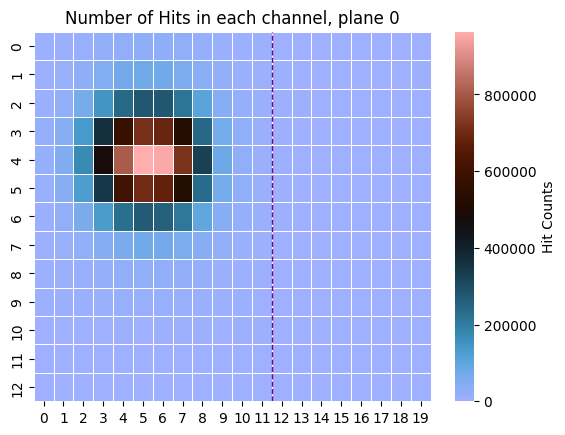

In [15]:
rf.hits_amount_colormap_single_plane(hit_data_1101, 0)

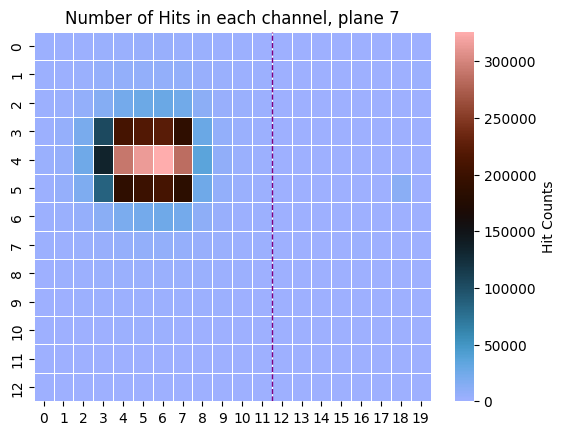

In [16]:
rf.hits_amount_colormap_single_plane(hit_data_1101, 7)

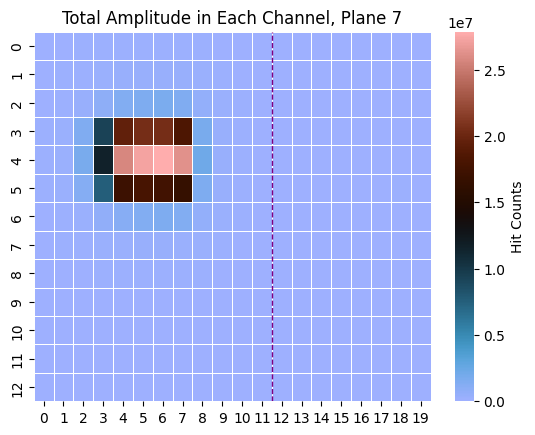

In [17]:
rf.hits_amp_colormap_single_plane(hit_data_1101, 7)

In [54]:
# Shows the shower evolution of a SINGLE EVENT in the sensor with the amplitude in every sensor
def single_event_evolution_amp(hit_data, TLU_number, cmap="berlin"):

    # get the path of the specific event
    TLU_event_data = hit_data[TLU_number]

    
    # count the amount of hits of each pad in every plane
    for plane in range(7,-1,-1):
        
        # get the channels hits on the wanted plane
        hits_plane = TLU_event_data[TLU_event_data.plane == plane]
        hits_plane_ch = TLU_event_data[TLU_event_data.plane == plane].ch

        # create channel(pads) matrix
        counts_matrix = np.zeros((13, 20))
        
        # modify the pads matrix only if there are any hits on the plane
        if len(hits_plane_ch) != 0:
            # count the amount of hits in each pad on the plane
            pads_1d, counts = np.unique(hits_plane_ch, return_counts=True)

            # convert the 1d index of the pads into 2d coordinates
            pads_2d = divmod(pads_1d, 20)    

    
            # distribute the counts for each pad on a 12x20 matrix
            counts_matrix = np.zeros((13, 20))
            for i in range(len(pads_1d)):
                q = pads_2d[0][i]           # quotinent of the i'th pad (row from bottom)
                r = pads_2d[1][i]           # remainder of the i'th pad (column)
                pad_amp = TLU_event_data[hits_plane.ch == pads_1d[i]].amp
                counts_matrix[-1-q][r] = pad_amp[0]
                
        # creat the colormap
        plt.figure(figsize=(12, 8))
        seaborn.heatmap(counts_matrix, cmap=cmap, linewidths=0.5, cbar_kws={'label': 'Hit Counts'}, annot=True, fmt=".0f")
        plt.title(f'Number of Hits in each channel, plane {7-plane}')
        plt.axvline(x=12, color='purple', linestyle='--', linewidth=1)
        plt.show()





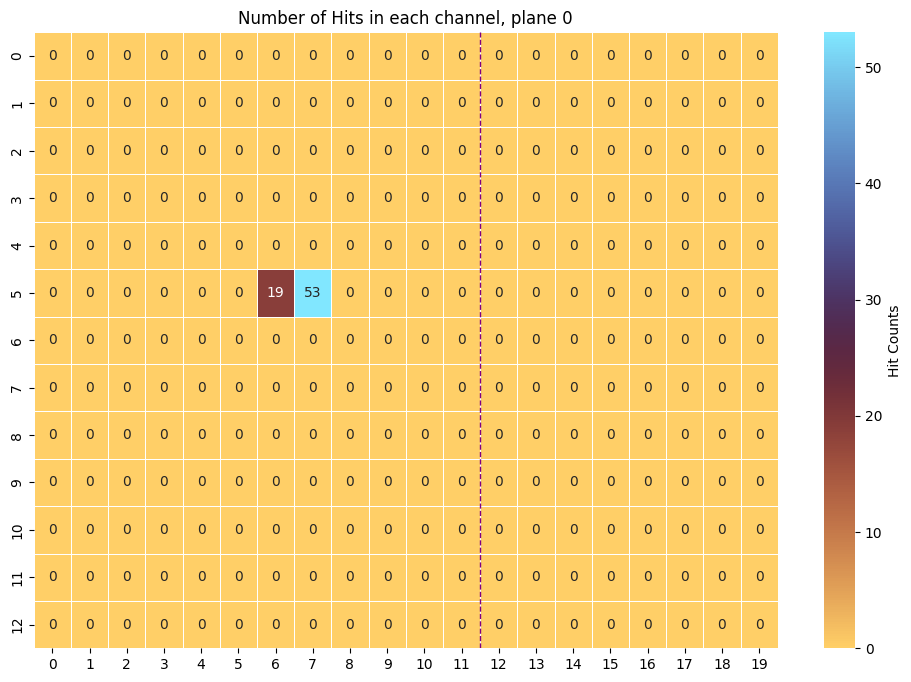

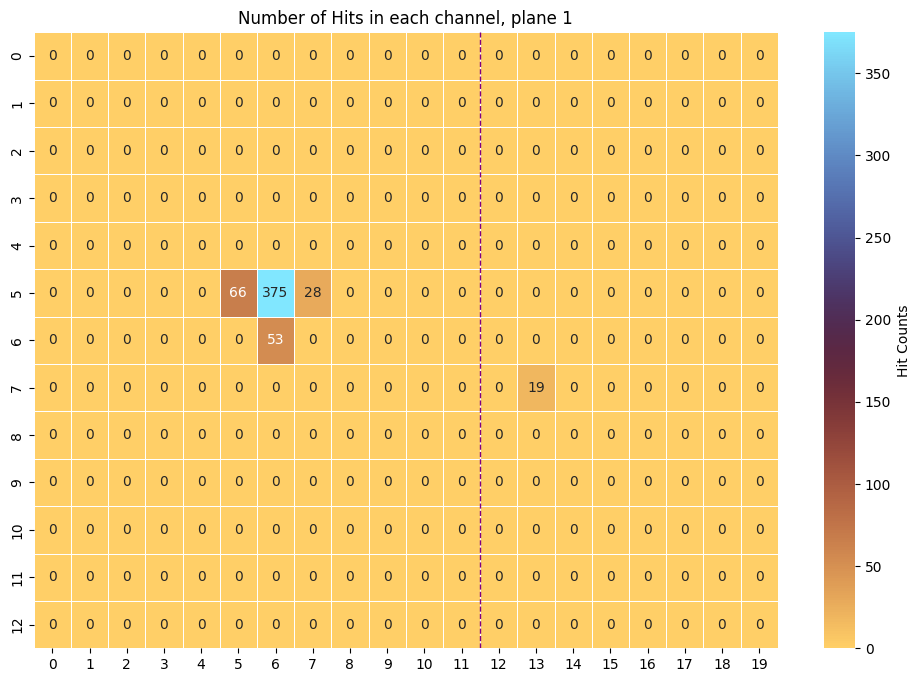

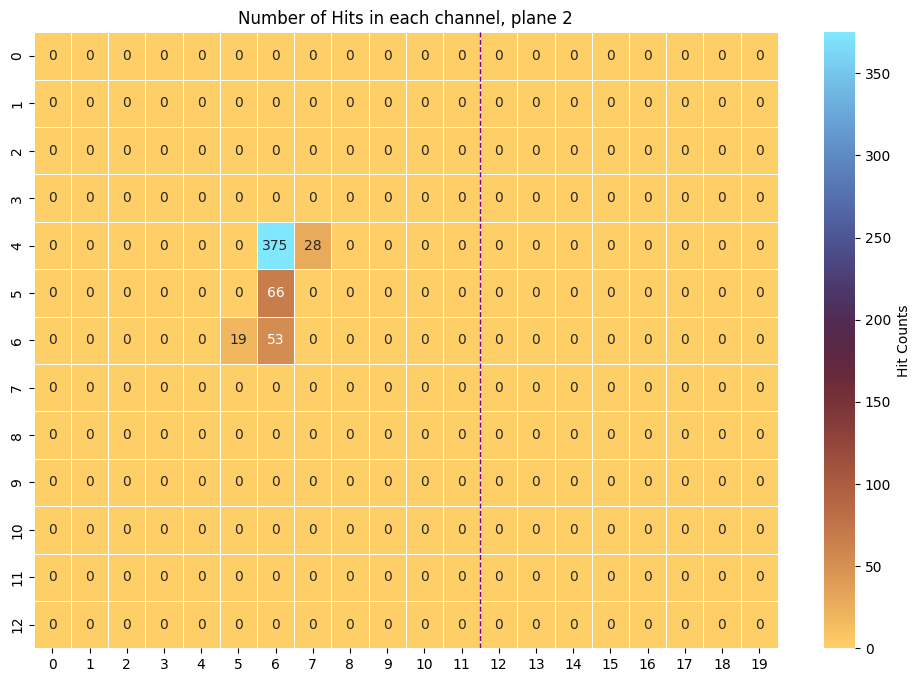

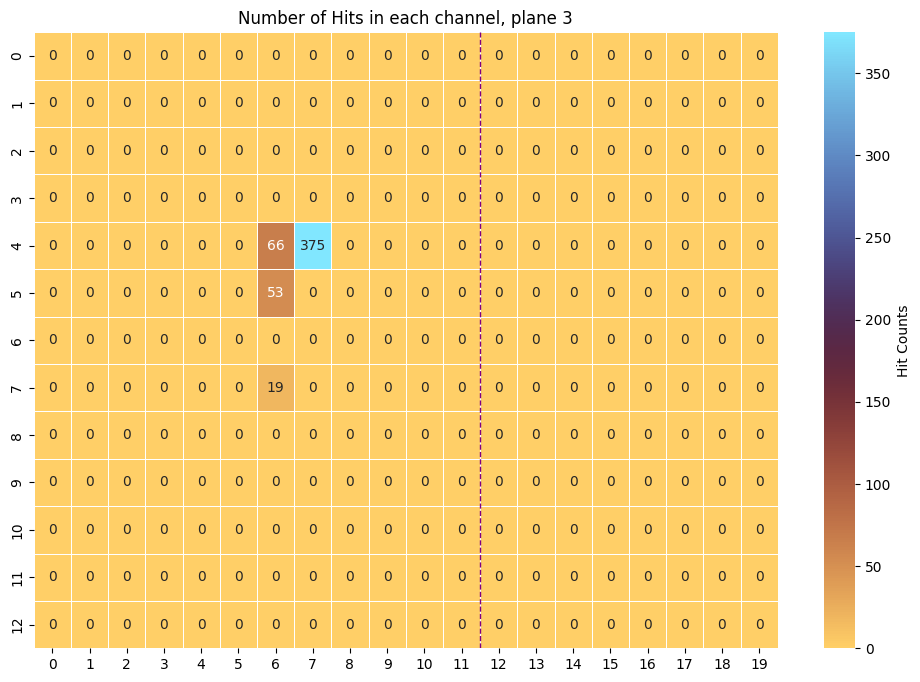

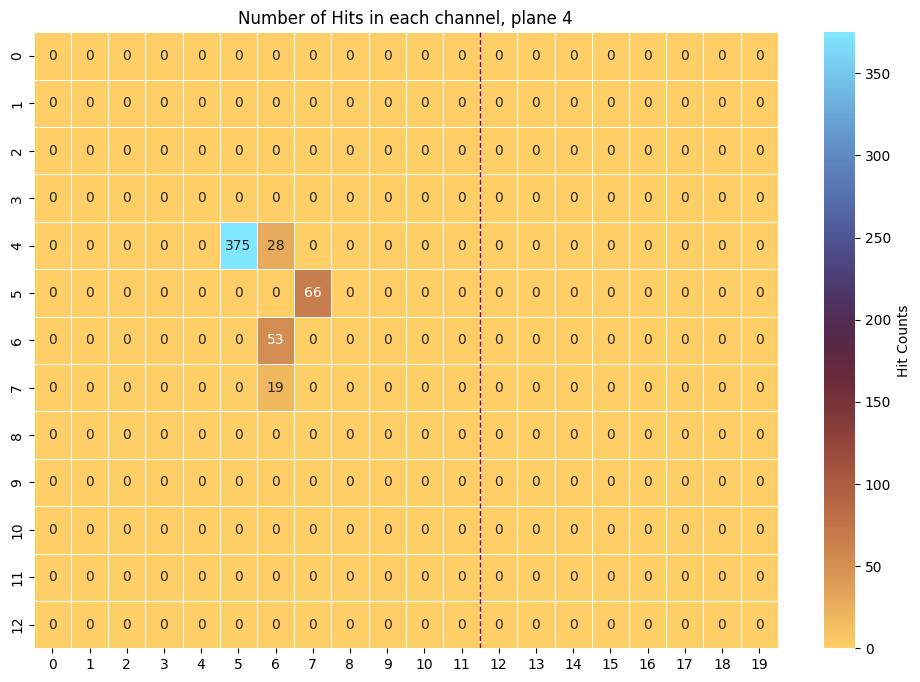

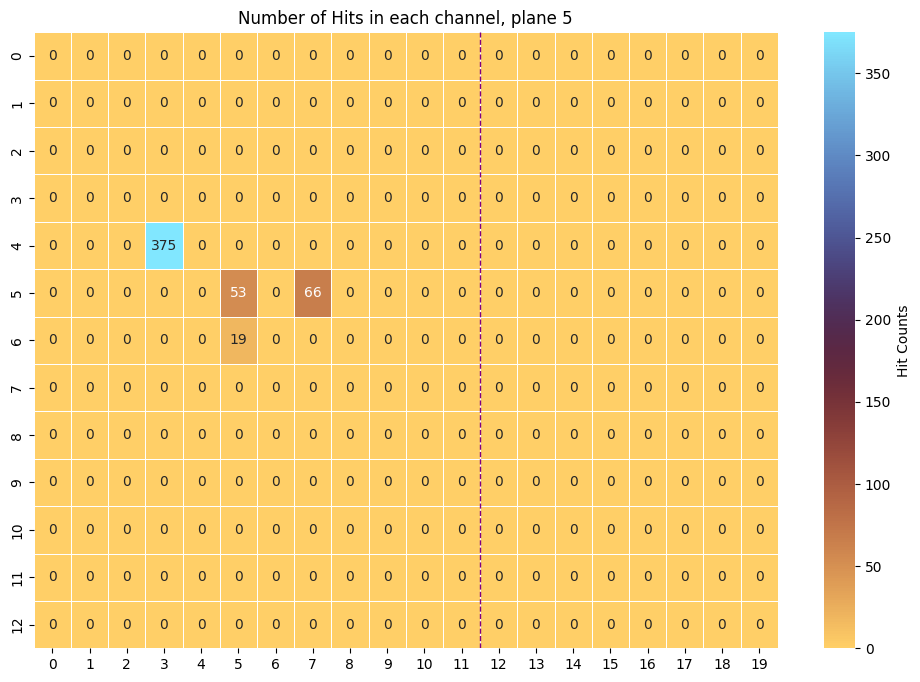

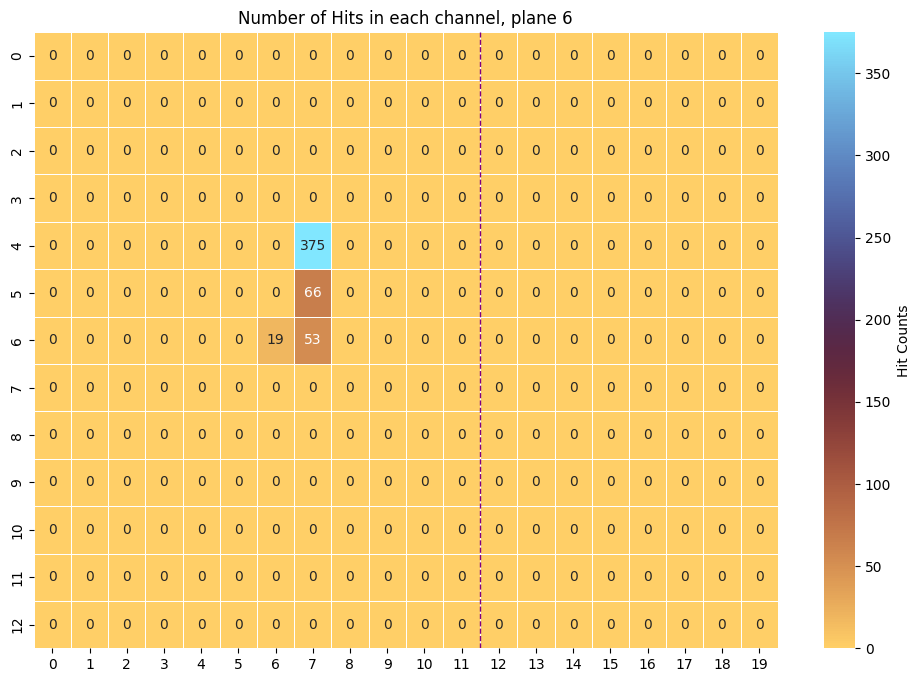

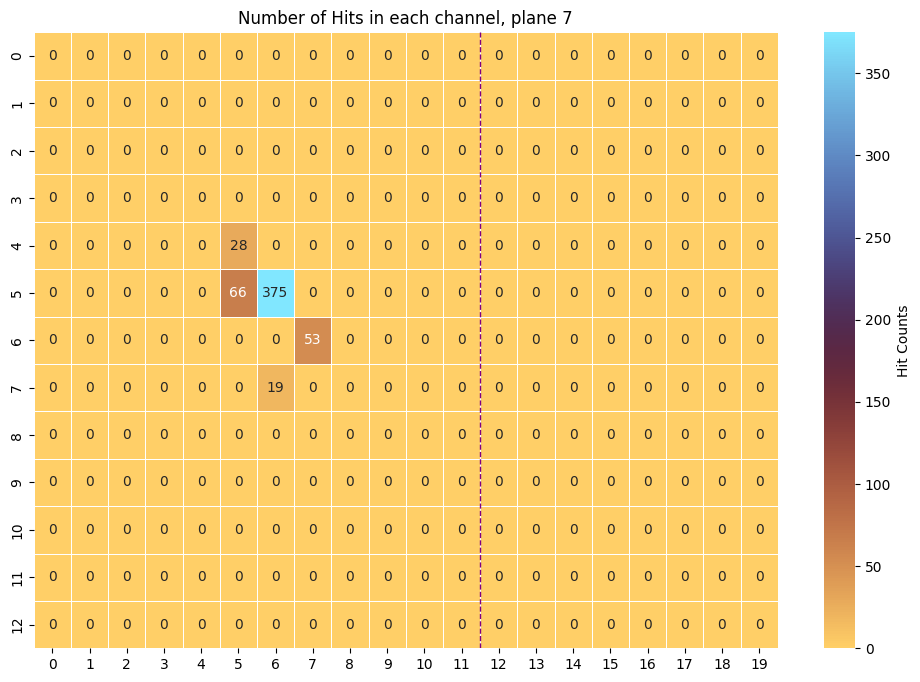

In [65]:
single_event_evolution_amp(hit_data_1101, 5122, cmap="managua")

In [ ]:
# find how much of the data is empty - triggered but not measured
# hit data is an array where each entry is an event(tlu) 
# find the slots in the data where the entire event is empty
TLU_event_data = hit_data_1101[1].show()

# np.max(hit_data_1101.amp)

[{plane: 0, ch: 126, amp: 13},
 {plane: 0, ch: 143, amp: 30},
 {plane: 0, ch: 163, amp: 81},
 {plane: 0, ch: 164, amp: 100},
 {plane: 0, ch: 183, amp: 471},
 {plane: 0, ch: 184, amp: 398},
 {plane: 0, ch: 185, amp: 29},
 {plane: 0, ch: 203, amp: 88},
 {plane: 0, ch: 224, amp: 41},
 {plane: 1, ch: 163, amp: 148},
 ...,
 {plane: 3, ch: 164, amp: 20},
 {plane: 3, ch: 183, amp: 227},
 {plane: 3, ch: 184, amp: 50},
 {plane: 4, ch: 162, amp: 29},
 {plane: 4, ch: 163, amp: 45},
 {plane: 4, ch: 183, amp: 108},
 {plane: 4, ch: 184, amp: 19},
 {plane: 6, ch: 183, amp: 54},
 {plane: 6, ch: 184, amp: 28}]
